In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
sns.set_palette('pastel')
sns.set_style('white')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
boston = datasets.load_boston()

Рассмотрим датасет поближе

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Судя по всему, названия переменных находятся в feature_names, поэтому сохраним их для названий колонок датафрейма

In [7]:
columns = boston.feature_names

In [8]:
#boston.target #Результативный признак

In [9]:
df = pd.DataFrame(boston.data)

In [10]:
df.columns = columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Посмотрим дискриптивную статистику для каждой из переменных

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Проведем анализ выбросов. Для этого построим ящичковые диаграммы для каждой из переменных

Text(0.5,1,'Ящичковая диаграмма для CRIM')

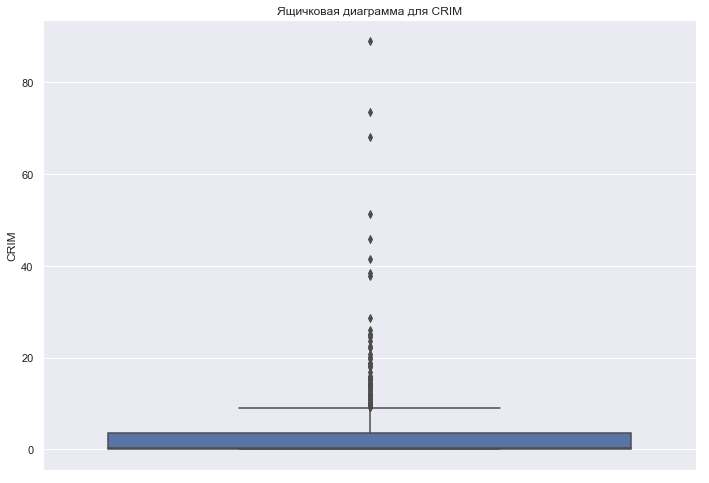

In [12]:
box_crim = sns.boxplot(y = 'CRIM', data=df)
box_crim.set_title('Ящичковая диаграмма для CRIM')

В выборке присутствуют варианты жилья, для которых уровень преступности на душу населения значительно превышает 1.5IQR.

Text(0.5,1,'Ящичковая диаграмма для ZN')

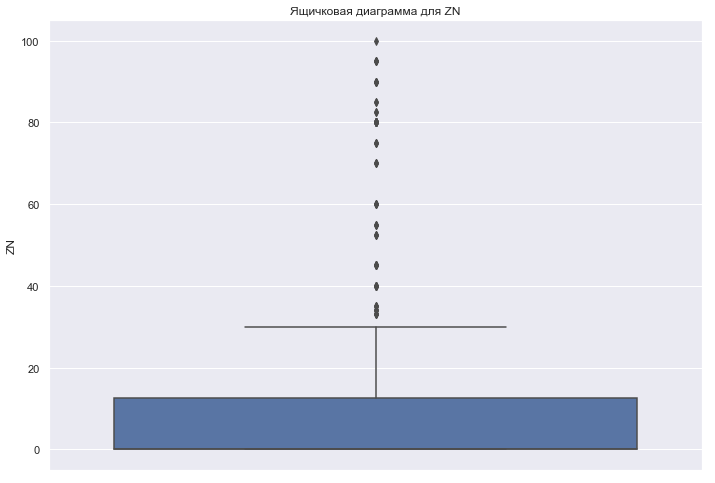

In [13]:
box_zn = sns.boxplot(y = 'ZN', data=df)
box_zn.set_title('Ящичковая диаграмма для ZN')

Для некоторых вариантов жилья характеристикой является ...

Text(0.5,1,'Ящичковая диаграмма для RM')

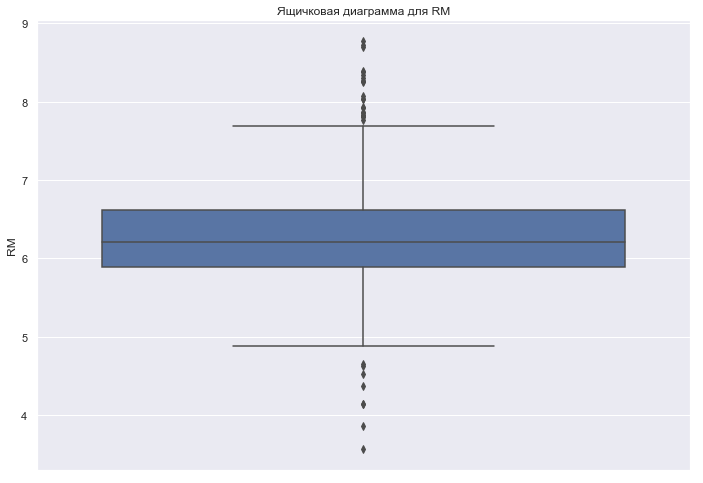

In [14]:
box_rm = sns.boxplot(y = 'RM', data=df)
box_rm.set_title('Ящичковая диаграмма для RM')

В среднем предлагается около 6 комнат в жилье, однако есть варианты с большим или меньшим количеством комнат.

Text(0.5,1,'Ящичковые диаграммы для всех переменных')

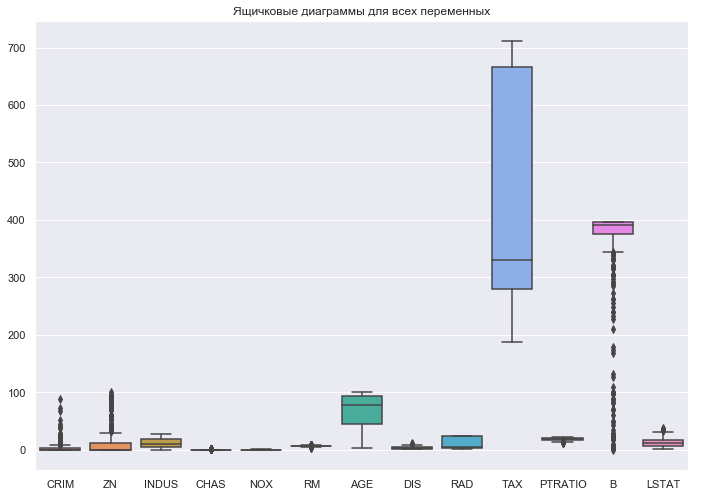

In [15]:
boxes = sns.boxplot(data=df)
boxes.set_title('Ящичковые диаграммы для всех переменных')

Больше всего аномальных наблюдений для переменной B.

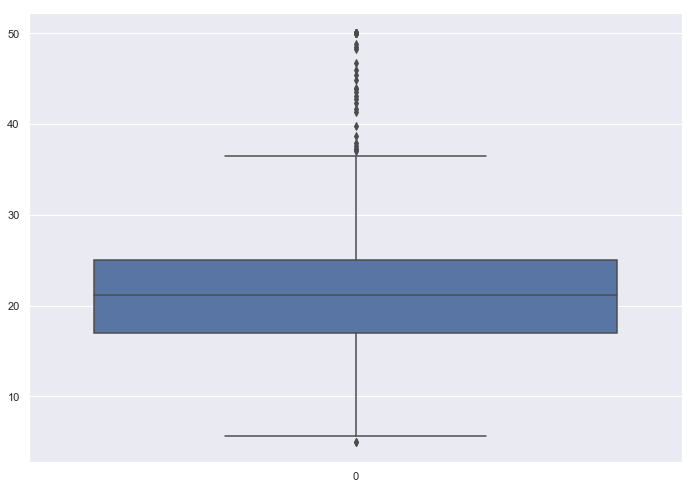

In [16]:
sns.boxplot(data=boston.target)

In [17]:
X = pd.DataFrame(boston.data)

In [18]:
full_df = df.join(pd.DataFrame(boston.target))

In [19]:
columns = np.append(columns, 'y')
full_df.columns = columns

Построим диаграммы рассеяния для переменных:

Text(0.5,1,'Диаграмма рассеивания RM и результативного признака y')

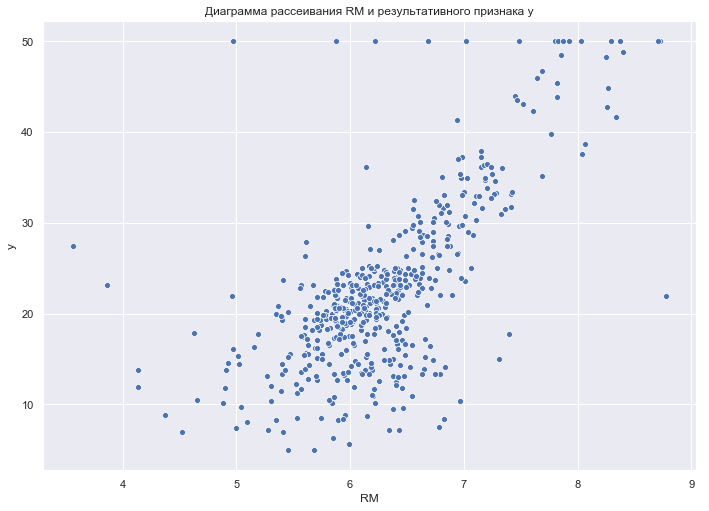

In [20]:
sc_plt1 = sns.scatterplot(x='RM', y='y', data=full_df)
sc_plt1.set_title('Диаграмма рассеивания RM и результативного признака y')

Text(0.5,1,'Диаграмма рассеивания NOX и DIS')

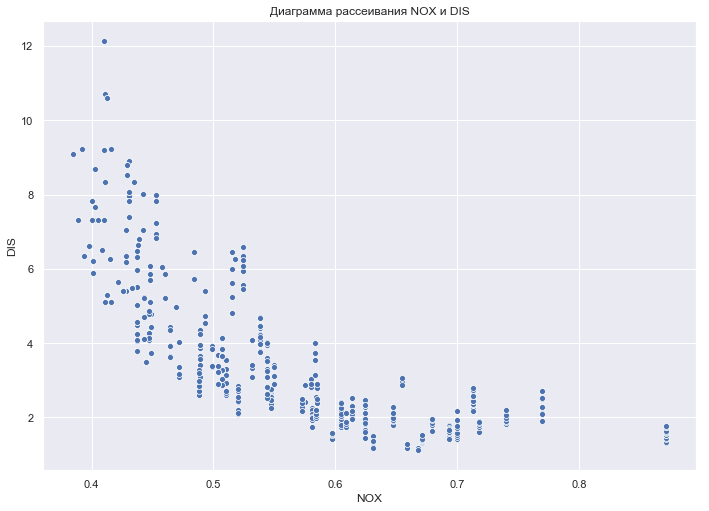

In [21]:
sc_plt2 = sns.scatterplot(x='NOX', y='DIS', data=full_df)
sc_plt2.set_title('Диаграмма рассеивания NOX и DIS')

Text(0.5,1,'Диаграмма рассеивания AGE и DIS')

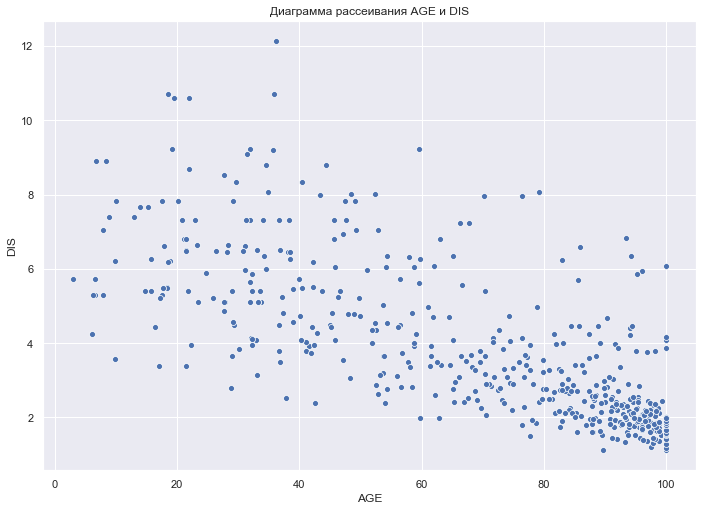

In [22]:
sc_plt3 = sns.scatterplot(x='AGE', y='DIS', data=full_df)
sc_plt3.set_title('Диаграмма рассеивания AGE и DIS')

Проверим, есть ли в выборке пропуски

In [23]:
full_df.dropna().count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
y          506
dtype: int64

Пропусков нет

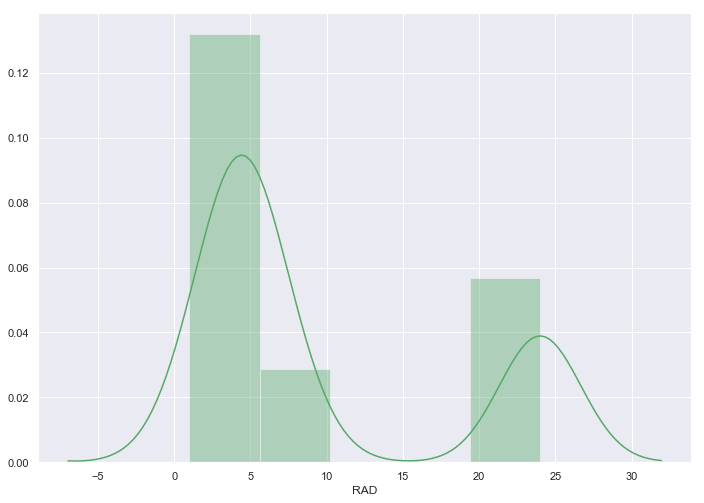

In [24]:
sns.distplot(full_df['RAD'], hist=True, color="g")

Распределение индекса доступности радиальных шоссе имеет 2 вершины: наиболее часто этот индекс принимает значение 5, далее - около 24.

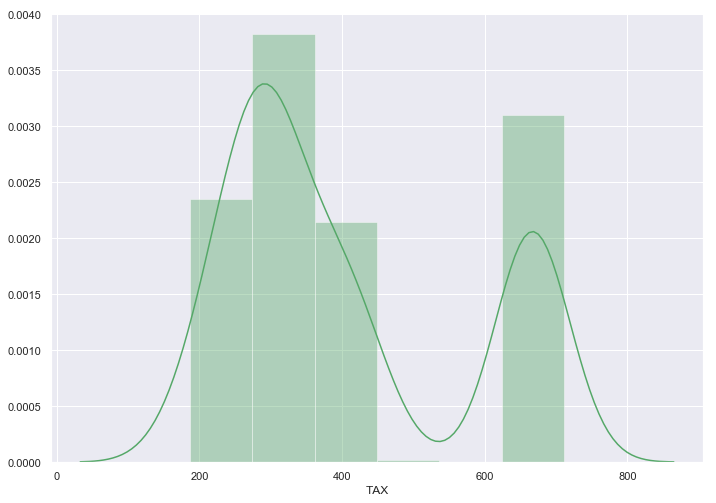

In [25]:
sns.distplot(full_df['TAX'], hist=True, color="g")

Распределение полной стоимости налога на имущество на каждые 10 тыс. долларов также имеет 2 вершины: около 250 и 670.

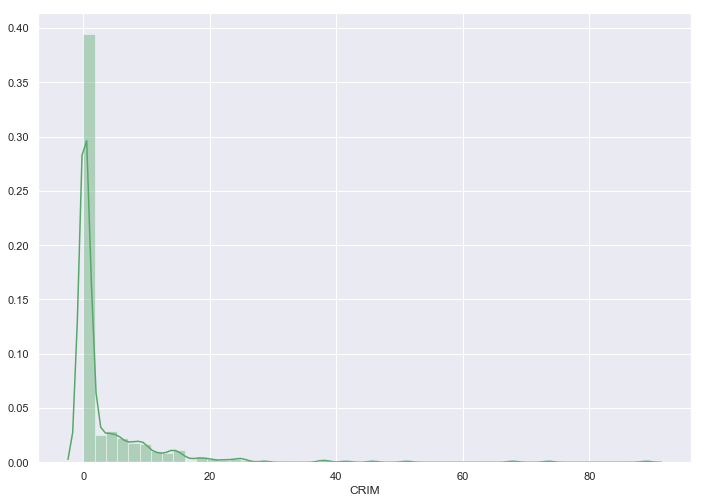

In [26]:
sns.distplot(full_df['CRIM'], hist=True, color="g")

В основном уровень преступности для вариантов жилья из выборки достаточно низок (в основном - около нуля), за исключением некоторых аномальных наблюдений, обозначенных раннее.

Разделим выборку на 2 части:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


Обучим модель линейной регрессии:

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
reg.score(X_train,y_train)

0.7355203833151899

In [15]:
reg.coef_

array([-1.26823829e-01,  5.14689449e-02, -5.24331158e-02,  4.21179412e+00,
       -1.66518551e+01,  3.89615165e+00, -1.92821152e-02, -1.77765679e+00,
        2.95443884e-01, -1.20817696e-02, -8.20711511e-01,  7.59510994e-03,
       -4.81551061e-01])

In [16]:
reg.intercept_

36.08070867285148

Прогнозы для тестовых данных:

In [17]:
y_pred = reg.predict(X_test)

Найдем среднеквадратичную ошибку:

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
mean_squared_error(y_test, y_pred)

22.44003809438704

R-квадрат для данной модели:

In [20]:
r2_score(y_test, y_pred) 

0.7380055707468423

Теперь построим регрессию относительно оси Ох, чтобы найти константное решение:

In [21]:
reg2 = LinearRegression().fit(np.zeros(379).reshape(-1, 1), y_train)

Получим константу, которая показывает единую цену, которую мы предсказали для всех вариантов жилья из тренировочной выборки:

In [22]:
reg2.intercept_

22.55197889182058

Предсказанные значения для тестовой выборки:

In [23]:
y_pred2 = reg2.predict(np.zeros(506-379).reshape(-1, 1))

Заметим, что для тестовой выборки предсказываются такие же значения, как и для тренировочной, потому что в данном случае имеет место константное решение.

In [24]:
mean_squared_error(y_test, y_pred2)

85.65665668022864

In [25]:
r2_score(y_pred2, y_test) 

-4.241512197431063e+29

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
reg3 = RandomForestRegressor(n_estimators=200)

In [28]:
reg3.fit(X_train, y_train.astype(int))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred3_train = reg3.predict(X_train)

In [30]:
y_pred3_train

array([14.45 , 19.76 , 21.905, 20.08 , 29.55 , 18.31 , 12.765, 10.145,
       23.535,  8.825, 13.61 , 14.235, 33.75 ,  7.275, 20.705, 15.375,
       22.35 , 19.945, 28.835, 25.585, 35.045, 15.475, 19.02 , 46.82 ,
       22.39 , 23.765, 17.3  , 45.455, 32.45 , 20.515, 19.02 , 17.75 ,
       25.115, 18.62 , 22.51 , 22.67 , 16.63 , 20.495, 12.84 , 25.775,
       34.225, 23.2  , 23.265, 20.86 , 26.955, 19.835, 19.1  , 12.94 ,
       23.25 , 22.715, 19.24 , 18.965, 27.165, 24.525, 24.96 , 16.9  ,
       22.04 , 11.105, 13.435, 14.08 , 38.135, 12.255, 13.29 , 15.835,
       21.19 , 21.35 , 19.52 , 30.915, 11.48 , 18.685, 21.59 ,  9.235,
       43.395, 22.615, 23.975, 18.555, 17.61 , 17.71 , 20.965, 18.71 ,
       26.98 , 34.38 , 22.33 , 21.58 , 18.365, 12.07 , 15.205, 18.72 ,
       22.76 , 48.835, 18.065, 19.795, 23.85 , 30.015, 13.935, 15.875,
       48.495, 22.905, 17.245, 18.835, 18.095,  7.54 , 14.205, 21.6  ,
       24.165, 20.635, 18.805, 11.985, 22.185, 15.915, 13.33 , 22.28 ,
      

In [59]:
y_train

array([23.7, 23. , 17.1, 20.7, 20.4, 15.6, 22.5, 24.7, 20.9, 13.6, 36.5,
       19.1, 19. , 18.9, 19.5,  7.5, 20.9, 25.2, 18.2, 30.1, 22.4,  8.5,
       20.2, 17.8, 18.3, 22.5, 20.5, 25. , 17.1, 22.2, 50. , 23.9, 18.7,
       33.4, 39.8, 25. , 10.4, 17.4, 46. , 18.7, 24.1, 26.6, 22.7, 16.2,
       21.5, 14.9, 19.5, 13.4, 14.1, 21. , 25.1, 50. ,  7.2, 28.7, 24.4,
       17.8, 21.8, 28.1, 18.8, 50. , 25. ,  8.3, 20.7, 24.8, 19.1, 11.8,
       13.8, 31.6, 27.5, 28.6, 10.2, 25. , 23.8, 29.6, 18.4, 28.5, 21.1,
       21.7, 11.8, 46.7, 20.6, 23. , 23.1, 13.5,  7.2, 21.7, 23.8, 19.6,
       24.3, 15.6, 18.2, 41.7, 19.9, 23.8, 11.3, 21.6, 25. , 18.3, 22.6,
       21.9, 15.4, 36.1, 20. , 22.2, 33.2, 20.3, 18.1, 21.4, 13.3, 18.5,
       15.4, 21.5, 30.1, 17.3, 21.9, 50. , 20.6, 24.4, 16.5, 23.4, 12.7,
       16.2, 13. , 32.5, 24.8, 29.1, 20. , 23.2, 35.4, 22.6, 13.8, 33.4,
       33.2,  7. , 22.8, 17.1, 23.6, 14.3, 24.5, 13.1, 37.6, 19. , 23.4,
       50. ,  8.8,  8.8, 22.4, 16.7, 33.1, 17. , 17

In [46]:
y_pred3 = reg3.predict(X_test)

In [47]:
mean_squared_error(y_test, y_pred3)

14.052401771653544

Данная модель дает меньшее значение среднеквадратической ошибки, следовательно, значения, предсказанные ею, более близки к значениям результативной выборки, значит, эта модель показала себя лучше, чем обычная линейная регрессия.

Попробуем снизить размерность исходного пространства 

Посмотрим, какие переменные коррелированы между собой:

In [48]:
X.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
1,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=12)

In [51]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
print(pca.explained_variance_ratio_)

[8.05814643e-01 1.63050854e-01 2.13486883e-02 6.95695814e-03
 1.30786367e-03 7.27742761e-04 4.20024207e-04 2.48721489e-04
 8.53904192e-05 3.08110199e-05 6.65495193e-06 1.56785857e-06]


In [53]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)

In [54]:
reg_pca = RandomForestRegressor(n_estimators=200)
reg_pca.fit(X_train_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred_pca = reg_pca.predict(X_test_new)

In [56]:
mean_squared_error(y_test, y_pred_pca)

17.593865944881877

С помощью понижения размерности исходного пространства переменных удается понизить среднеквадратическую ошибку относительно линейной регрессионной модели на исходных переменных, однако достигнутое значение по-прежнему превышает среднеквадратическую ошибку 